In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
dftrain = pd.read_csv('train.csv')
dftest = pd.read_csv('test.csv')

In [3]:
dftrain.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
dftrain.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
dftrain.drop(["Id"],axis=1,inplace=True)
dftest.drop(["Id"],axis=1,inplace=True)

In [6]:
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [7]:
#delete feauture with so many missing values

dftrain.drop(["Alley","FireplaceQu","Fence","PoolQC","MiscFeature"],axis=1,inplace=True)
dftest.drop(["Alley","FireplaceQu","Fence","PoolQC","MiscFeature"],axis=1,inplace=True)

In [8]:
#filling the nan value for both numeric and categorial values


from statistics import mean , mode
# Select numeric columns.
numtrain = dftrain.select_dtypes('number')
numtest = dftest.select_dtypes('number')
# Select string and object columns.
objtrain = dftrain.select_dtypes('object')
objtest = dftest.select_dtypes('object')
# Fill numeric columns with mean.
dftrain[numtrain.columns] = numtrain.fillna(numtrain.mean())
dftest[numtest.columns] = numtest.fillna(numtest.mean())
# Fill object columns with mode.
dftrain.fillna(dftrain[objtrain.columns].mode().iloc[0], inplace=True)
dftest.fillna(dftest[objtrain.columns].mode().iloc[0], inplace=True)   

In [9]:
#check the variance of numeric columns so if they have low variance then remove them

# Calculate the variance of each numeric column
variances = dftrain.var()

# Print the variances
print(variances)

MSSubClass       1.789338e+03
LotFrontage      4.850576e+02
LotArea          9.962565e+07
OverallQual      1.912679e+00
OverallCond      1.238322e+00
YearBuilt        9.122154e+02
YearRemodAdd     4.262328e+02
MasVnrArea       3.260520e+04
BsmtFinSF1       2.080255e+05
BsmtFinSF2       2.602391e+04
BsmtUnfSF        1.952464e+05
TotalBsmtSF      1.924624e+05
1stFlrSF         1.494501e+05
2ndFlrSF         1.905571e+05
LowQualFinSF     2.364204e+03
GrLivArea        2.761296e+05
BsmtFullBath     2.692682e-01
BsmtHalfBath     5.700283e-02
FullBath         3.035082e-01
HalfBath         2.528937e-01
BedroomAbvGr     6.654938e-01
KitchenAbvGr     4.854892e-02
TotRmsAbvGrd     2.641903e+00
Fireplaces       4.155947e-01
GarageYrBlt      5.757400e+02
GarageCars       5.584797e-01
GarageArea       4.571251e+04
WoodDeckSF       1.570981e+04
OpenPorchSF      4.389861e+03
EnclosedPorch    3.735550e+03
3SsnPorch        8.595059e+02
ScreenPorch      3.108889e+03
PoolArea         1.614216e+03
MiscVal   

C:\Users\mvalavi\AppData\Local\Temp\ipykernel_16240\2210212593.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  variances = dftrain.var()


In [12]:
#delete numeric columns with low variance 

#delete feauture with so many missing values

dftrain.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars"],axis=1,inplace=True)
dftest.drop(["BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","Fireplaces","GarageCars"],axis=1,inplace=True)

dftrain.info()
dftest.info()

KeyError: "['BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars'] not found in axis"

In [13]:
#check for  High Cardinality in categorial columns in dataset
categorical_cols = dftrain.select_dtypes(include="object").columns
cardinality = dftrain[categorical_cols].nunique()
threshold = 6  # Set your desired threshold here
high_cardinality_cols = cardinality[cardinality > threshold].index.tolist()
print("High cardinality columns:", high_cardinality_cols)

High cardinality columns: ['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType']


In [14]:
#delete categorial columns with high cardinality
dftrain.drop(['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType'],axis=1,inplace=True)
dftest.drop(['Neighborhood', 'Condition1', 'Condition2', 'HouseStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Functional', 'SaleType'],axis=1,inplace=True)

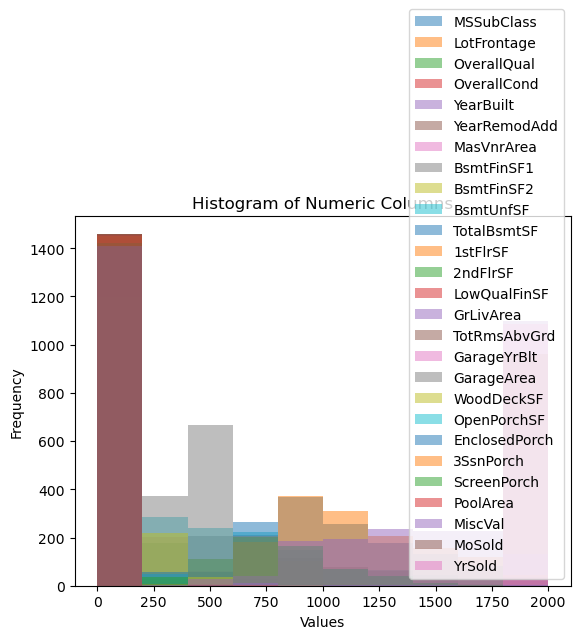

In [13]:
#check distribution of numeric values

# Select the numeric columns you want to plot
dftrainnonprice=dftrain.drop(["SalePrice","LotArea"],axis=1)
numeric_columns = dftrainnonprice.select_dtypes(include="number").columns

# Plot histogram for each numeric column
for column in numeric_columns:
    plt.hist(dftrainnonprice[column], bins=10, alpha=0.5, label=column, range=(0,2000))

# Add labels and title to the plot
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.title("Histogram of Numeric Columns")

# Add legend to distinguish the columns
plt.legend()

In [14]:
#the distrubion seems ok now check for outliners in numeric values

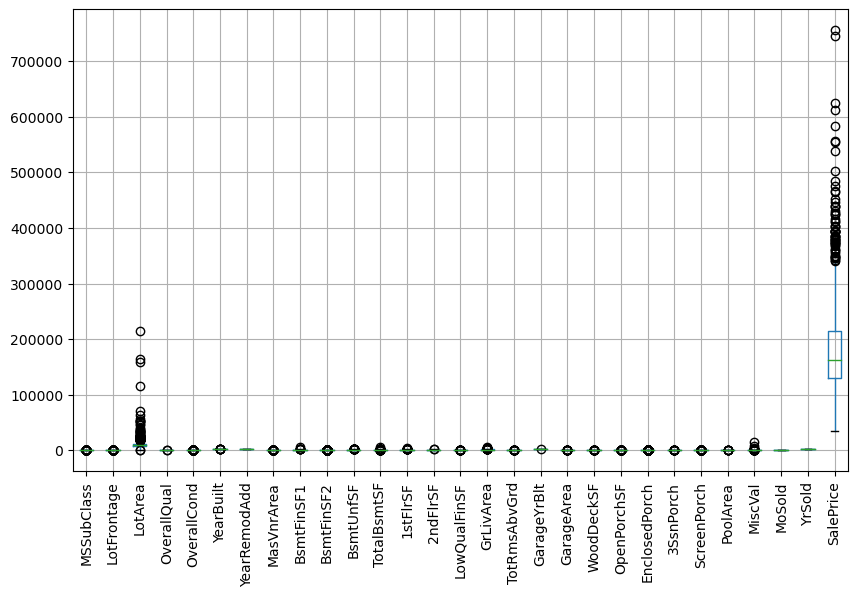

In [15]:
numeric_columns2 = dftrain.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,6))
dftrain.boxplot(column=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice'])
plt.xticks(rotation=90)
plt.show()

In [16]:
#lotarea has a lot of outliner so remove it
dftrain.drop(["LotArea"],axis=1,inplace=True)
dftest.drop(["LotArea"],axis=1,inplace=True)
dftrain.info()
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 57 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   BldgType       1460 non-null   object 
 10  OverallQual    1460 non-null   int64  
 11  OverallCond    1460 non-null   int64  
 12  YearBuilt      1460 non-null   int64  
 13  YearRemodAdd   1460 non-null   int64  
 14  RoofStyle      1460 non-null   object 
 15  MasVnrType     1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  ExterCon

<AxesSubplot:>

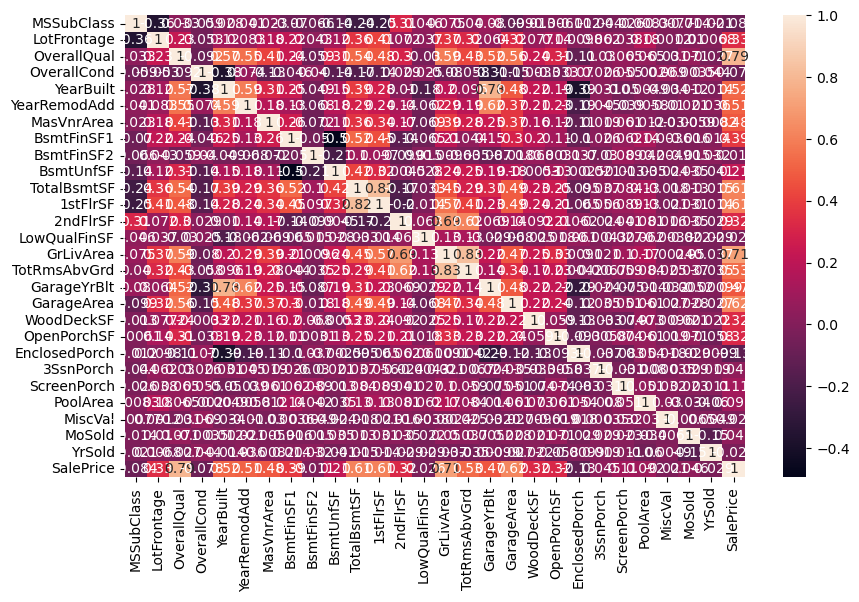

In [17]:
#check for correlation of variables together


plt.figure(figsize=(10,6))
sns.heatmap(data=dftrain.corr(),annot=True)

In [18]:
#GrLivArea and  1stFlrSF has high correlation but do not remove them and remove them later.checked now delete these two and check the performance
dftrain.drop(["1stFlrSF","GrLivArea"],axis=1,inplace=True)
dftest.drop(["1stFlrSF","GrLivArea"],axis=1,inplace=True)

In [19]:
# Select string and object columns.
objtrain2 = dftrain.select_dtypes('object')

In [20]:
column_names = objtrain2.columns.tolist()
print(column_names)

['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']


In [21]:
dumtrain=pd.get_dummies(dftrain,columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']
               ,drop_first = True)
dumtest=pd.get_dummies(dftest,columns = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'BldgType', 'RoofStyle', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleCondition']
               ,drop_first = True)

In [22]:
dumtrain.info()
dumtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 126 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(23), uint8(100)
memory usage: 439.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 120 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(8), int64(17), uint8(95)
memory usage: 420.4 KB


In [23]:
#Reconcile the features
train_columns = dumtrain.columns.tolist()
test_columns = dumtest.columns.tolist()
missing_columns_test = set(train_columns) - set(test_columns)
salecolumns=dumtrain["SalePrice"]
dumtest2=dumtest.reindex(columns=test_columns + list(missing_columns_test), fill_value=0)
dumtest2=dumtest2.drop(["SalePrice"],axis=1)
dumtrain2=dumtrain

In [25]:
dumtrain2.info()
dumtest2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 126 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(3), int64(23), uint8(100)
memory usage: 439.3 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 125 entries, MSSubClass to Utilities_NoSeWa
dtypes: float64(8), int64(22), uint8(95)
memory usage: 477.4 KB


In [26]:
column_names = dumtrain2.columns.tolist()
print(column_names)

['MSSubClass', 'LotFrontage', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM', 'Street_Pave', 'LotShape_IR2', 'LotShape_IR3', 'LotShape_Reg', 'LandContour_HLS', 'LandContour_Low', 'LandContour_Lvl', 'Utilities_NoSeWa', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LotConfig_Inside', 'LandSlope_Mod', 'LandSlope_Sev', 'BldgType_2fmCon', 'BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_TwnhsE', 'RoofStyle_Gable', 'RoofStyle_Gambrel', 'RoofStyle_Hip', 'RoofStyle_Mansard', 'RoofStyle_Shed', 'MasVnrType_BrkFace', 'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Fa', 'ExterQual_Gd', 'ExterQual_TA', 'ExterCond_Fa', 'ExterCond_Gd', 'ExterCond_Po', '

In [27]:
#normalization


from sklearn.preprocessing import StandardScaler
#  columns except 'column_to_exclude'
column_to_exclude = 'SalePrice'

# Get the column names to be scaled (excluding the column to exclude)
columns_to_scale = [col for col in dumtrain2.columns if col != column_to_exclude]

# Create a new DataFrame with the selected columns
dftrain_scaled = dumtrain2.drop(["SalePrice"],axis=1)

# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftrain_scaled[columns_to_scale] = scaler.fit_transform(dumtrain2[columns_to_scale])

#  'column_to_concat'
column_to_concat = dumtrain2["SalePrice"] # Example column data

# Concatenate the column to the DataFrame
df_concatenated = pd.concat([dftrain_scaled, column_to_concat], axis=1)
finaltest=dumtest2
finaltrain=df_concatenated




# Apply StandardScaler to the selected columns
scaler = StandardScaler()
dftest_scaled= scaler.fit_transform(dumtest2)



finaltest=pd.DataFrame(dftest_scaled)
finaltrain=df_concatenated



In [28]:
finaltrain.info()
finaltest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 126 entries, MSSubClass to SalePrice
dtypes: float64(125), int64(1)
memory usage: 1.4 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 125 entries, 0 to 124
dtypes: float64(125)
memory usage: 1.4 MB


In [29]:
finaltrain.head()

,MSSubClass,LotFrontage,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SalePrice
0,0.073375,-0.229372,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,...,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,208500
1,-0.872563,0.451936,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.288653,-0.641228,...,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,181500
2,0.073375,-0.093110,0.651479,-0.517200,0.984752,0.830215,0.323060,0.092907,-0.288653,-0.301643,...,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,223500
3,0.309859,-0.456474,0.651479,-0.517200,-1.863632,-0.720298,-0.574410,-0.499274,-0.288653,-0.061670,...,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.091035,-0.117851,-2.138345,-0.305995,140000
4,0.073375,0.633618,1.374795,-0.517200,0.951632,0.733308,1.364570,0.463568,-0.288653,-0.174865,...,-0.069409,0.194085,-0.144841,0.299253,-0.052414,-0.091035,-0.117851,0.467651,-0.305995,250000


In [30]:
finaltest.head()

,0,1,2,3,4,5,6,7,8,9,...,115,116,117,118,119,120,121,122,123,124
0,-0.874711,0.555587,-0.751101,0.400766,-0.340945,-1.072885,-0.570108,0.063295,0.517348,-0.650619,...,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0
1,-0.874711,0.604239,-0.054877,0.400766,-0.439695,-1.214908,0.041273,1.063392,-0.297903,-0.339378,...,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0
2,0.061351,0.263676,-0.751101,-0.497418,0.844059,0.678742,-0.570108,0.773254,-0.297903,-0.954994,...,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0
3,0.061351,0.458284,-0.054877,0.400766,0.876976,0.678742,-0.456889,0.357829,-0.297903,-0.527038,...,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0
4,1.465443,-1.244533,1.337571,-0.497418,0.679475,0.394694,-0.570108,-0.387298,-0.297903,1.058917,...,-0.074253,-0.091066,-0.134699,0.460211,-0.299365,0.0,0.0,0.0,0.0,0.0


In [53]:
X=finaltrain.drop("SalePrice",axis=1)
y= finaltrain['SalePrice']

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the regression models
linear_regression = LinearRegression()
ridge_regression = Ridge(alpha=0.5)  # Set the alpha parameter for Ridge regression
lasso_regression = Lasso(alpha=0.1)  # Set the alpha parameter for Lasso regression
decision_tree_regression = DecisionTreeRegressor(max_depth=5)  # Set the max_depth parameter for Decision Tree regression
random_forest_regression = RandomForestRegressor(n_estimators=100,max_depth=11)  # Set the n_estimators parameter for Random Forest regression

linear_regression.fit(X,y)
prediction0lg0model=linear_regression.predict(X_test)
print("Linear regression Mean Square error:",mean_squared_error(prediction0lg0model,y_test))
      
ridge_regression.fit(X,y)
prediction0ridge0=ridge_regression.predict(X_test)
print("ridgi regression Mean Square error:",mean_squared_error(prediction0ridge0,y_test))   
      
lasso_regression .fit(X,y)
prediction0Lasso0=lasso_regression .predict(X_test)
print("Lasso regression Mean Square error:",mean_squared_error(prediction0Lasso0,y_test)) 
      
decision_tree_regression.fit(X,y)
prediction0dtr0=decision_tree_regression.predict(X_test)
print("dtr regression Mean Square error:",mean_squared_error(prediction0dtr0,y_test))
      

random_forest_regression.fit(X,y)
prediction0rf0=random_forest_regression.predict(X_test)
print("rf0 regression Mean Square error:",mean_squared_error(prediction0rf0,y_test))

Linear regression Mean Square error: 1018151179.6126028
ridgi regression Mean Square error: 1018594537.7931395
Lasso regression Mean Square error: 1018169618.9376975
dtr regression Mean Square error: 989667850.4558477


C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.446e+11, tolerance: 9.208e+08
  model = cd_fast.enet_coordinate_descent(


rf0 regression Mean Square error: 167988758.1271411


In [56]:
predictiontestcv=random_forest_regression.predict(finaltest)
dfx = pd.DataFrame(predictiontestcv,columns = ['Column_A'])
dfx.to_csv('RandomForesrt3.csv')

C:\Users\mvalavi\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
